In [1]:
import pandas as pd    # conjunto de funções que se usa para dados em tabela (csv)
#https://pandas.pydata.org/docs/index.html
import matplotlib.pyplot as plt # conjunto de funções que se usa para plotagem 
#https://matplotlib.org/stable/index.html
import numpy as np #para trabalhar com vetores/arrays

In [2]:
arq1=pd.read_csv('corrigidos_mapadecalor/RF 20211010-20211016 corrigido.csv',sep=',',header=0, index_col=0,
                       parse_dates=["UTCDateTime"], na_values='NaN') #para windows usar o r na frente

<AxesSubplot:xlabel='UTCDateTime'>

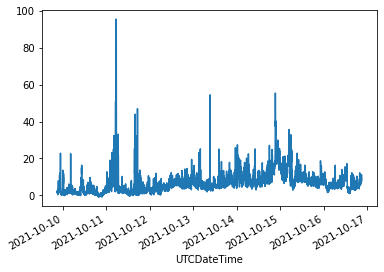

In [3]:
arq1['pm2.5'].plot()

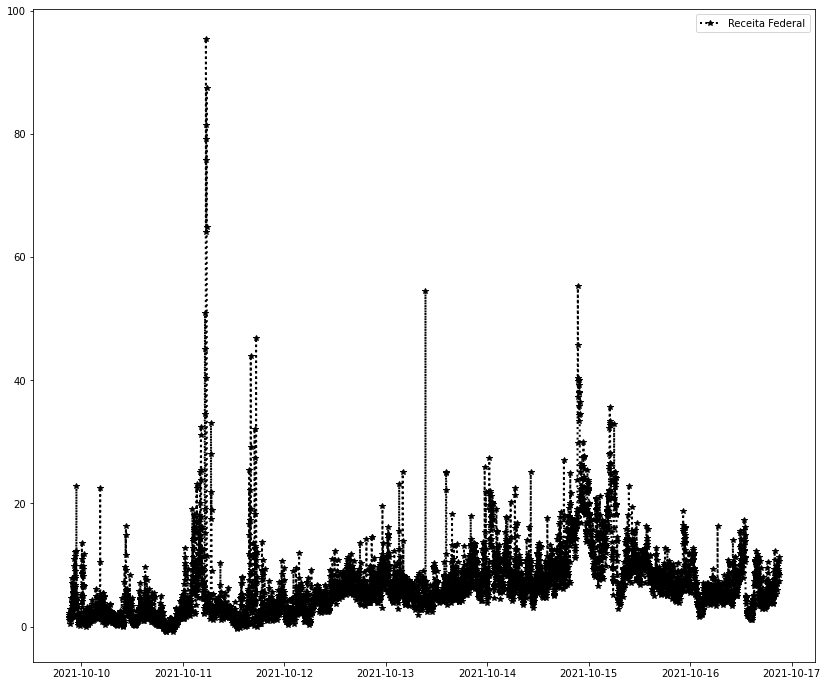

In [4]:
fig = plt.figure(figsize=(14, 12)) 
ax = plt.axes()

x=arq1['pm2.5'].index
y=arq1['pm2.5']
label='Receita Federal'

ax.plot(x,y,label=label,color='black',marker='*',linestyle=':',linewidth=2)
ax.legend()

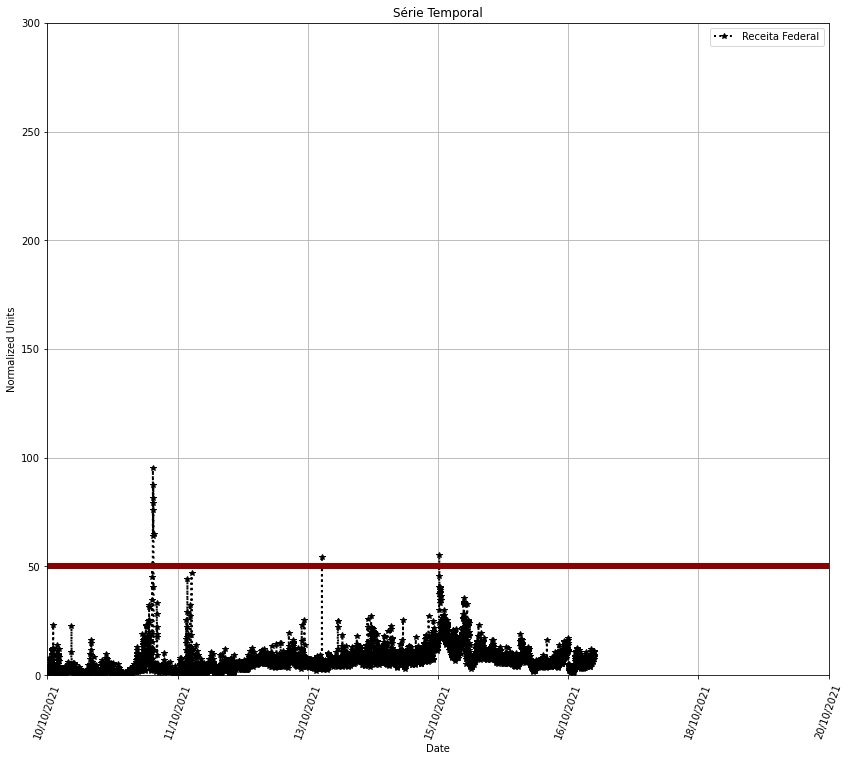

In [8]:
fig = plt.figure(figsize=(14, 12)) 
ax = plt.axes()

x=arq1['pm2.5'].index
y=arq1['pm2.5']
label='Receita Federal'

ax.plot(x,y,label=label,color='black',marker='*',linestyle=':',linewidth=2)
ax.axhline(50, color='darkred',linestyle='-',linewidth=6) 
ax.legend()
ax.set_ylim(0, 300)
ax.set_xlim(pd.to_datetime('2021-10-10'),pd.to_datetime('2021-10-15'))
ax.set_xticks(pd.date_range('2021-10-10','2021-10-20',periods=7), rotation=70)
ax.set_xticklabels(pd.date_range('2021-10-10','2021-10-20',periods=7).strftime('%d/%m/%Y'), rotation=70) 

ax.set_xlabel('Date')
  
ax.set_ylabel('Normalized Units') 
ax.set_title('Série Temporal') 
plt.grid()

In [ ]:
arq1['pm2.5'].where(arq1['pm2.5']>0)

In [9]:
arq1['pm2.5'].index.strftime('%d/%m/%Y')

Index(['09/10/2021', '09/10/2021', '09/10/2021', '09/10/2021', '09/10/2021',
       '09/10/2021', '09/10/2021', '09/10/2021', '09/10/2021', '09/10/2021',
       ...
       '16/10/2021', '16/10/2021', '16/10/2021', '16/10/2021', '16/10/2021',
       '16/10/2021', '16/10/2021', '16/10/2021', '16/10/2021', '16/10/2021'],
      dtype='object', name='UTCDateTime', length=5053)

In [12]:
df=arq1.resample('1H').mean()
print(df)

                              pm2.5A     pm2.5B     pm2.5  Temperature_C  \
UTCDateTime                                                                
2021-10-09 21:00:00-03:00   7.247000   6.518667  2.785291      22.979167   
2021-10-09 22:00:00-03:00  16.767667  11.253667  6.494416      22.625000   
2021-10-09 23:00:00-03:00   4.089677   5.176452  1.545887      22.116935   
2021-10-10 00:00:00-03:00  14.565333   7.196333  4.578543      21.354167   
2021-10-10 01:00:00-03:00   4.756000   4.387000  1.470713      22.104167   
...                              ...        ...       ...            ...   
2021-10-16 16:00:00-03:00  11.267667  11.389667  5.942428      26.625000   
2021-10-16 17:00:00-03:00   5.637667   8.824000  4.053763      25.937500   
2021-10-16 18:00:00-03:00   9.295806  10.786452  5.592074      26.250000   
2021-10-16 19:00:00-03:00   9.345333  13.177333  6.217465      25.812500   
2021-10-16 20:00:00-03:00  12.561333  19.329667  8.508189      25.500000   

           

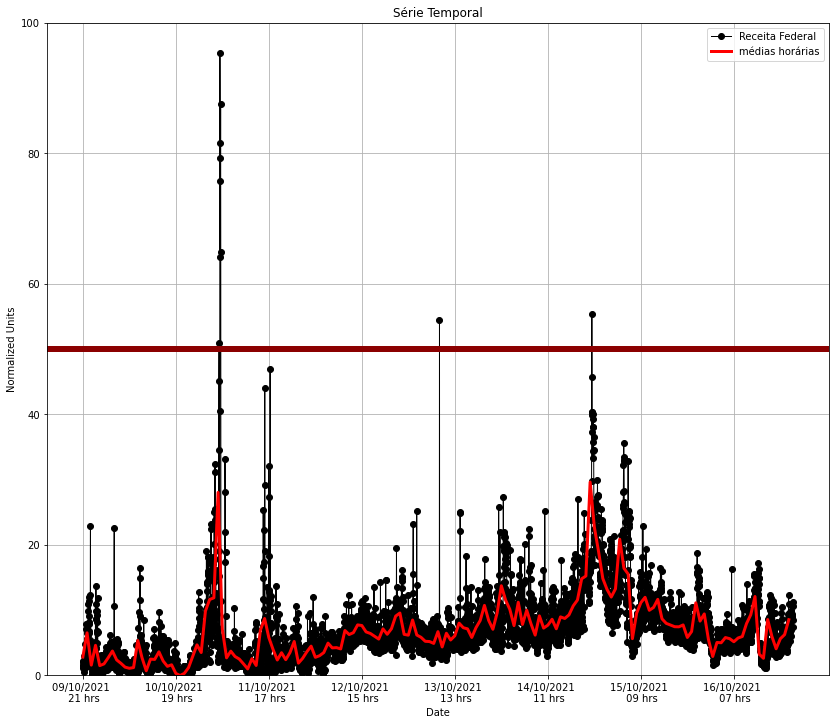

In [26]:
fig = plt.figure(figsize=(14, 12)) 
ax = plt.axes()

x=arq1['pm2.5'].index
y=arq1['pm2.5']
y2=df['pm2.5']
x2=df['pm2.5'].index
label='Receita Federal'

ax.plot(x,y,label=label,color='black',marker='o',linestyle='-',linewidth=1)
ax.plot(x2,y2,label="médias horárias",color='red',marker='',linestyle='-',linewidth=3)
ax.axhline(50, color='darkred',linestyle='-',linewidth=6) 
ax.legend()
ax.set_ylim(0, 100)
#ax.set_xlim(pd.to_datetime('2021-10-10'),pd.to_datetime('2021-10-15'))
ax.set_xticks(df['pm2.5'].index[::22], rotation=70)
ax.set_xticklabels(df['pm2.5'].index[::22].strftime('%d/%m/%Y \n %H hrs'), rotation=0) 

ax.set_xlabel('Date')
  
ax.set_ylabel('Normalized Units') 
ax.set_title('Série Temporal') 
plt.grid()